### Importing the libraries

In [20]:
from pydoc import help  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 40 # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [2]:
datas = pd.read_excel("business_survey_results.xlsx")
#X = data.loc["":]  # independent variables data
#y = data.V1  # dependednt variable data
datas_right=datas[["Κέρδη προ τόκων και φόρων 2015","Φόροι 2015","Κέρδη προ τόκων και φόρων 2016","Φόροι 2016"]]
datas_left=datas[['2. Η Νομική μορφή της επιχείρησης είναι:','1ος Στόχος']]

datas_right = datas_right.rename(columns = {'Κέρδη προ τόκων και φόρων 2016': 'profit_before_taxes_2016'}, inplace = False)
datas_right = datas_right.rename(columns = {'Κέρδη προ τόκων και φόρων 2015': 'profit_before_taxes_2015'}, inplace = False)
datas_right = datas_right.rename(columns = {'Φόροι 2015': 'taxes_2015'}, inplace = False)
datas_right = datas_right.rename(columns = {'Φόροι 2016': 'taxes_2016'}, inplace = False)
datas_left = datas_left.rename(columns = {'2. Η Νομική μορφή της επιχείρησης είναι:': 'νομική_μορφή_επιχείρισης'}, inplace = False)
datas_left = datas_left.rename(columns = {'1ος Στόχος': 'first_goal'}, inplace = False)

datas_right=datas_right.fillna(datas_right.mean())

le=LabelEncoder()

datas_left= datas_left.apply(lambda cols: le.fit_transform(cols.astype(str)), axis=0, result_type='expand')
datas_left['νομική_μορφή_επιχείρισης']=datas_left['νομική_μορφή_επιχείρισης'].replace(0,math.floor(datas_left['νομική_μορφή_επιχείρισης'].mean()))
datas_total = pd.concat([datas_left,datas_right],axis=1)
target=datas_total.νομική_μορφή_επιχείρισης
x=datas_total.loc[:, datas_total.columns!= 'νομική_μορφή_επιχείρισης']

x_scaled = StandardScaler().fit_transform(x)
x_scaled


array([[ 1.29461695, -0.17794858,  0.        , -0.1207263 ,  0.        ],
       [ 0.39834368, -0.14735491,  0.        , -0.08888288,  0.        ],
       [ 0.39834368, -0.14606669,  0.        , -0.09180644,  0.        ],
       ...,
       [ 0.39834368, -0.15465685, -0.18664485, -0.08993316, -0.17769799],
       [-1.84233951, -0.07514542,  0.00574886, -0.1361916 ,  0.00103692],
       [-1.39420287, -0.        ,  0.        ,  0.        ,  0.        ]])

In [21]:
pca=PCA(n_components=2)

In [22]:
pca.fit(x_scaled)

PCA(n_components=2)

In [23]:
x_pca=pca.transform(x_scaled)
print(x_pca.shape)
x_pca

(243, 2)


array([[-0.24680357, -0.42053938],
       [-0.14441878, -0.06036012],
       [-0.14507309, -0.05934651],
       [-0.20201194,  0.36360277],
       [-0.20318657,  0.58996022],
       [-0.10921567,  0.13655748],
       [-0.15206013, -0.05277943],
       [-0.12075461,  0.53833762],
       [ 0.07732416,  0.41270098],
       [ 0.0748313 ,  0.65624676],
       [ 0.00483285,  0.71858048],
       [-0.40625847, -0.59635039],
       [-0.27280409, -0.72612492],
       [-0.18657373,  0.57546362],
       [-0.19552886,  0.58040991],
       [-0.00397446,  0.72720222],
       [ 0.0887357 ,  0.39768477],
       [ 0.11395139,  0.60819092],
       [-0.11266627, -0.09440259],
       [-0.32166416, -0.2219307 ],
       [-0.30291704, -0.23997881],
       [-0.02458148,  0.59268832],
       [-0.41815288, -0.58817472],
       [-0.42967431, -0.57505065],
       [-0.20833797, -0.46096873],
       [-0.14579563, -0.0591446 ],
       [-0.01743133,  0.50871953],
       [-0.19212218, -0.24600968],
       [-0.1392654 ,

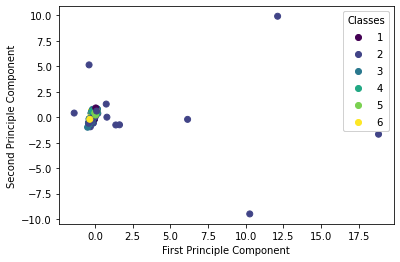

In [29]:

fig, ax = plt.subplots()

scatter = ax.scatter(x_pca[:,0],x_pca[:,1],c=target)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)

In [25]:
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit(x,target).transform(x)
print(lda.explained_variance_ratio_)
print(x_lda.shape)
x_lda

[0.57660592 0.42149113]
(243, 2)


array([[-1.10630956,  0.93871609],
       [-0.4046442 ,  0.24511515],
       [-0.40132722,  0.24713558],
       [ 0.60463453, -0.88013788],
       [ 0.92968948, -1.24840878],
       [-0.06094331, -0.10701338],
       [-0.41317702,  0.23939025],
       [ 0.98317029, -1.2070463 ],
       [ 0.72860008, -0.74134581],
       [ 1.13271983, -1.05813034],
       [ 0.97561219, -1.15953939],
       [-1.13883992,  0.86100532],
       [-1.08313088,  0.90570365],
       [ 0.93325192, -1.24529238],
       [ 0.91654881, -1.25612644],
       [ 0.96449319, -1.16693439],
       [ 0.70030837, -0.75824893],
       [ 1.07372643, -1.09250962],
       [-0.39741587,  0.25139473],
       [-0.45089415,  0.15816606],
       [-0.41603895,  0.18046363],
       [ 0.90128733, -1.28961319],
       [-1.14055702,  0.85916274],
       [-1.13461003,  0.8621998 ],
       [-1.0885544 ,  0.95190489],
       [-0.40785183,  0.24304767],
       [ 0.64516982, -0.79845508],
       [-0.77488541,  0.58007437],
       [ 0.96461911,

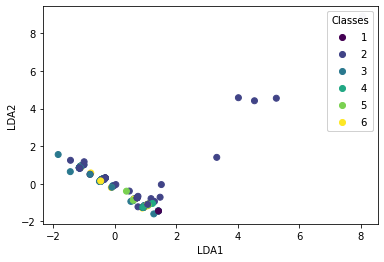

In [30]:
fig, ax = plt.subplots()

scatter = ax.scatter(x_lda[:,0],x_lda[:,1],c=target)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)

To sum up: We can observe that the selected data are unrelated from the beginning.For that reason the data in both diagrams are not separated properly.Also, LDA is like PCA which helps in dimensionality reduction, but it focuses on maximizing the separability among known categories by creating a new linear axis and projecting the data points on that axis. Thus even in our dataset LDA technique achieves better separation.